In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [193]:
data = pd.read_csv('C:\\Users\\Deepak\\Downloads\\lcd-digits.csv', header = None)

In [194]:
data.shape

(100, 104)

In [195]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
# We have 100 digits information presented as 1D array (13*8 size)
digit = np.array(data.iloc[0]) # Checking what is there in first row 
bitmap = digit.reshape(13, 8)
print(bitmap)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


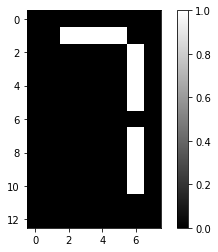

In [197]:
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [198]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [199]:
model = NMF(n_components = 7)
features = model.fit_transform(data)

In [200]:
print(data.shape)
print(features.shape)

(100, 104)
(100, 7)


In [201]:
features[0:3]

array([[4.76823559e-01, 0.00000000e+00, 0.00000000e+00, 5.90605054e-01,
        4.81559442e-01, 0.00000000e+00, 7.37557191e-16],
       [4.76823947e-01, 6.81486701e-01, 0.00000000e+00, 0.00000000e+00,
        4.81559442e-01, 4.93704551e-01, 0.00000000e+00],
       [0.00000000e+00, 6.81490275e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.93704550e-01, 4.51460009e-01]])

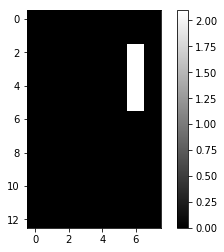

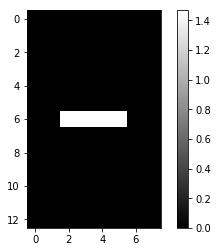

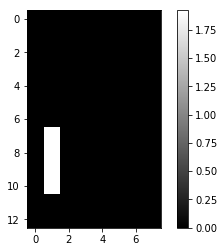

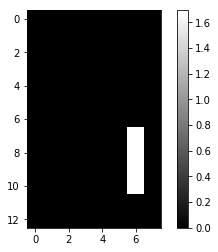

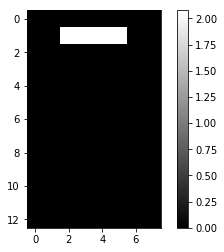

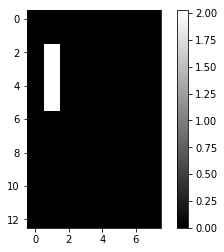

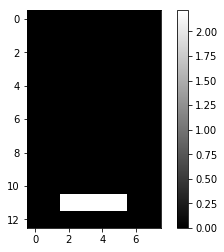

In [202]:
# Printing out what model has learnt:
for component in model.components_:
    show_as_image(component)

In [203]:
components_df = pd.DataFrame(model.components_)
print(components_df.shape)

(7, 104)


In [204]:
# Checking what component 3 has learned
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

62    1.693179
70    1.693179
78    1.693179
86    1.693179
0     0.000000
Name: 3, dtype: float64


In [205]:
bitmap = np.array(component).reshape(13,8)
bitmap

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.69317887, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.693178

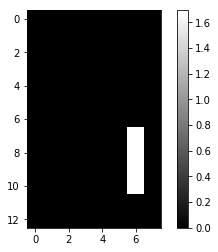

In [206]:
show_as_image(bitmap)

In [207]:
kmeans = KMeans()
kmeans.fit(features)
kmeans.predict(features)

array([6, 4, 5, 7, 4, 0, 0, 3, 4, 7, 4, 6, 1, 0, 6, 3, 0, 3, 2, 7, 6, 5,
       2, 5, 1, 1, 5, 3, 0, 3, 3, 5, 3, 0, 3, 0, 3, 3, 5, 5, 0, 7, 7, 5,
       7, 4, 7, 1, 6, 5, 7, 3, 6, 7, 5, 6, 1, 3, 4, 5, 2, 0, 0, 6, 3, 6,
       3, 3, 6, 6, 0, 4, 1, 4, 1, 7, 2, 5, 2, 0, 7, 0, 5, 6, 2, 3, 2, 1,
       3, 0, 2, 6, 6, 7, 0, 3, 3, 1, 5, 0])

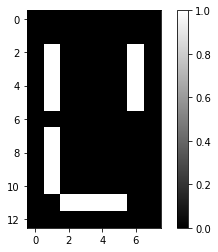

In [210]:
show_as_image(np.array(data.iloc[5]))

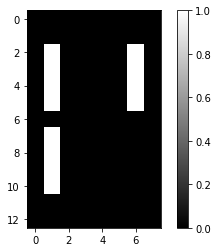

In [211]:
show_as_image(np.array(data.iloc[6]))

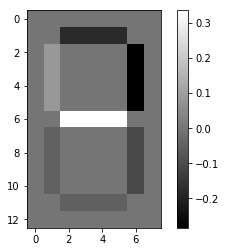

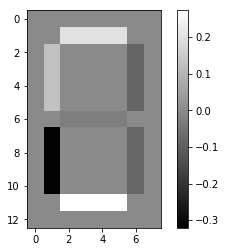

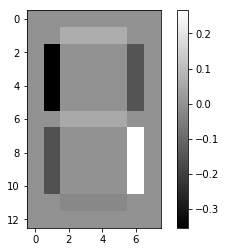

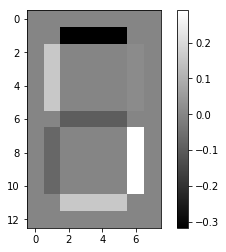

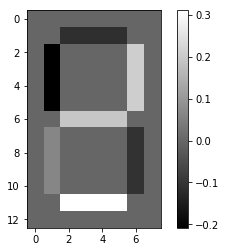

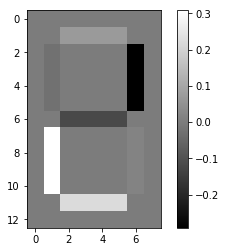

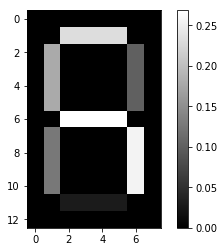

In [209]:
# Let's compare these results with PCA to identify that only NMF learns the parts but not PCA

model = PCA(n_components = 7)
features = model.fit_transform(data)
for component in model.components_:
    show_as_image(component)    